In [1]:
# change wd to repo home
import os
if os.getcwd().split('\\')[-1] == 'notebooks':
    os.chdir('..')

In [2]:
from modules.fm_functions import *
import seaborn as sns

In [3]:
import pandas as pd
FM_combined_data_2023 = pd.read_csv('./data/FM_fbref_combined_data_2023.csv', index_col='_Player_').iloc[:, 1:].dropna(axis=0)
FC_combined_data_2023 = pd.read_csv('./data/FC_fbref_combined_data_2023.csv', index_col='_Player_').iloc[:, 1:].dropna(axis=0)

# FM_combined_data_2022 = pd.read_csv('./data/FM_fbref_combined_data_2022.csv', index_col='_Player_').iloc[:, 1:].dropna(axis=0)
# FC_combined_data_2022 = pd.read_csv('./data/FC_fbref_combined_data_2022.csv', index_col='_Player_').iloc[:, 1:].dropna(axis=0)


In [4]:
FM_combined_data_2023

,defense_Blocks_Blocks,defense_Tackles_Tkl,defense_Tackles_TklW,defense_Tackles_Def 3rd,defense_Tackles_Mid 3rd,defense_Tackles_Att 3rd,defense__Int,defense__Clr,possession_Touches_Def Pen,possession_Touches_Def 3rd,...,Work Rate,Positioning,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength
_Player_,,,,,,,,,,,,,,,,,,,,,
Brenden Aaronson,26.0,32.0,18.0,13.0,13.0,6.0,2.0,4.0,11.0,108.0,...,15,8,16,15,13,9,13,15,14,10
Junior Adamu,1.0,5.0,1.0,1.0,2.0,2.0,0.0,2.0,2.0,7.0,...,13,6,16,14,11,14,14,15,13,11
Sargis Adamyan,16.0,14.0,9.0,2.0,9.0,3.0,5.0,7.0,8.0,30.0,...,14,7,14,13,15,11,11,16,13,10
Karim Adeyemi,11.0,16.0,14.0,9.0,4.0,3.0,3.0,5.0,10.0,69.0,...,14,5,18,14,7,11,12,18,13,10
Amine Adli,10.0,16.0,7.0,2.0,10.0,4.0,6.0,5.0,7.0,52.0,...,14,8,14,14,12,10,14,15,11,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nadir Zortea,2.0,5.0,4.0,3.0,1.0,1.0,1.0,3.0,1.0,20.0,...,12,12,13,13,12,10,14,14,14,13
Szymon Żurkowski,5.0,15.0,6.0,5.0,8.0,2.0,6.0,11.0,10.0,56.0,...,16,12,13,13,14,12,14,13,14,14
Milan Đurić,0.0,1.0,0.0,0.0,0.0,1.0,1.0,13.0,14.0,41.0,...,18,9,11,9,16,18,16,11,12,19


## Normalize each column selection by team

In [ ]:
from sklearn.preprocessing import MinMaxScaler

Drop players with fewer than 500 minutes

In [ ]:
fbref_combined_filtered_df = fbref_combined_df[fbref_combined_df['playingtime_PlayingTime_Min']>=500]

In [ ]:
# function to apply Min-Max scaling based on selected group and per-90 minutes stats
def group_minmax_scaling(group):
    scaler = MinMaxScaler()
    # Divide each column by 'playingtime_PlayingTime_Min' except for 'playingtime_PlayingTime_Min' itself
    for column in all_stats_columns:
        if column != 'playingtime_PlayingTime_Min' and column in group.columns:
            group[column] = group[column] / group['playingtime_PlayingTime_Min']
    # Apply Min-Max scaling
    group[all_stats_columns] = scaler.fit_transform(group[all_stats_columns])
    return group

In [ ]:
fbref_normalized_df = fbref_combined_filtered_df.groupby('_Squad_', as_index=False).apply(group_minmax_scaling)

## Cluster teams

**to do: PCA instead of clusters** 

In [ ]:
fbref_teams_df = fbref_combined_filtered_df.groupby('_Squad_')[all_stats_columns].mean()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
team_scaler = StandardScaler()
fbref_teams_scaled = team_scaler.fit_transform(fbref_teams_df.values)

In [ ]:
import seaborn as sns

n_clusters = {}
for k in range(1,11):
    team_clusters_kmeans = KMeans(n_clusters=k)
    team_clusters_kmeans.fit(fbref_teams_scaled)
    n_clusters[k] = team_clusters_kmeans.inertia_

<Axes: >

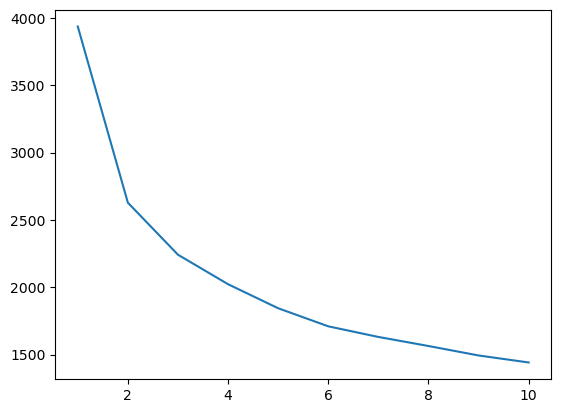

In [ ]:
sns.lineplot(n_clusters)

In [ ]:
team_clusters_kmeans = KMeans(n_clusters=4)

team_clusters = team_clusters_kmeans.fit_predict(fbref_teams_scaled)

fbref_teams_df['cluster'] = team_clusters

In [ ]:
fbref_normalized_df['team_cluster'] = fbref_teams_df.loc[fbref_normalized_df.loc[:, '_Squad_'], 'cluster'].values

In [ ]:
fbref_normalized_df.reset_index(inplace=True, drop=True)

## PCA

<Axes: >

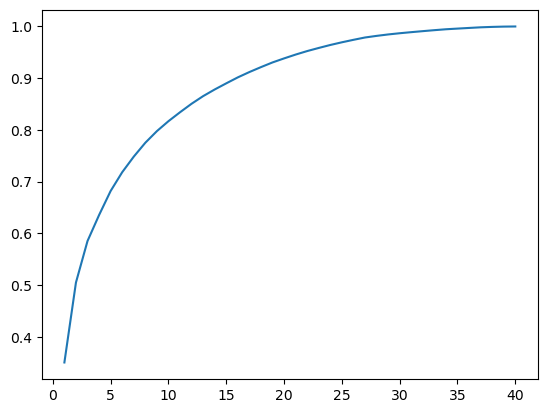

In [118]:
from sklearn.decomposition import PCA

pca_results = {n_components:PCA(n_components=n_components).fit(combined_data_2023[all_stats_columns]).explained_variance_ratio_.sum() \
               for n_components in range(1,len(all_stats_columns))}

sns.lineplot(pca_results)

In [173]:
pca = PCA(n_components=5)
pca_result = pca.fit_transform(combined_data_2023[all_stats_columns])
pca_result = pd.DataFrame(pca_result, index=combined_data_2023.index)

## Similarity matrix

In [174]:
from sklearn.preprocessing import MinMaxScaler
pca_result_scaled = MinMaxScaler().fit_transform(pca_result)
pca_result_scaled = pd.DataFrame(pca_result_scaled, index=pca_result.index)

In [182]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# similarity_matrix = cosine_similarity(pca_result_scaled)
similarity_matrix = euclidean_distances(pca_result_scaled)
similarity_matrix = pd.DataFrame(similarity_matrix, index=combined_data_2023.index, columns=combined_data_2023.index)

In [183]:
find_most_similar_strings('Frenkie De Jong', combined_data_2023.index, n=10)

['Frenkie de Jong',
 'Koni De Winter',
 'Charles De Ketelaere',
 'Lorenzo De Silvestri',
 'Grégoire Defrel',
 'Rodrigo De Paul',
 'Morten Frendrup',
 'Curtis Jones',
 'Kevin De Bruyne',
 'Ousmane Dembélé']

In [202]:
# similarity_matrix.loc['Frenkie de Jong'].sort_values(ascending=False)[1:21]
similarity_matrix.loc['Liberato Cacace'].sort_values(ascending=True)[1:21]

Name
Mërgim Vojvoda         0.114618
Johan Mojica           0.155593
Frenkie de Jong        0.164202
Filippo Terracciano    0.168975
Azzedine Ounahi        0.173853
Antonee Robinson       0.174288
Moi Gómez              0.177198
Ricardo Rodríguez      0.185934
Milan Badelj           0.191371
Kevin Kampl            0.204641
Pep Chavarría          0.206472
Jordan Ferri           0.207745
Nemanja Matić          0.208409
Matteo Ruggeri         0.211572
Mário Rui              0.213736
Rodrigo De Paul        0.221681
Toma Bašić             0.222728
Anthony Caci           0.222967
Antonino Gallo         0.224926
Billy Gilmour          0.226396
Name: Liberato Cacace, dtype: float64

<Axes: >

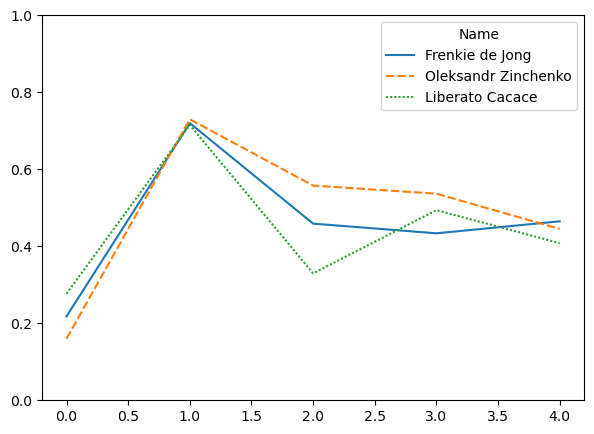

In [201]:
fig, ax = plt.subplots(figsize=(7,5))
ax.set_ylim(0,1)
sns.lineplot(data=pca_result_scaled.loc[['Frenkie de Jong', 'Oleksandr Zinchenko', 'Liberato Cacace']].T, ax=ax)


In [ ]:
pca_result.sort_values(9)

,0,1,2,3,4,5,6,7,8,9
Name,,,,,,,,,,
Sven Michel,1.596727,-0.108181,0.390198,0.142244,-0.412199,0.202568,0.352344,0.793794,0.279122,-0.725673
Lucas Ocampos,0.833378,0.650925,0.100488,-0.648745,0.680737,-0.289748,-0.084408,0.264597,-0.543274,-0.691679
Pavel Kadeřábek,0.168263,-0.224505,-0.172015,0.606167,0.290949,-0.313719,0.579426,0.088455,0.155548,-0.676844
Charles De Ketelaere,1.462730,0.674394,0.156669,-0.806421,0.481142,0.128098,-0.182010,0.280347,-0.287320,-0.666976
Matteo Ruggeri,-0.592365,0.251066,-0.498616,0.184101,0.110193,-0.130393,0.214962,0.238411,0.102820,-0.645761
...,...,...,...,...,...,...,...,...,...,...
Julián Álvarez,0.760758,-0.501523,-0.290919,0.685358,0.428161,-0.151061,0.054159,-0.122690,0.190397,0.637419
Patric Pfeiffer,-0.854909,-0.476240,0.384955,-0.041637,-0.350015,0.469473,0.581119,0.153693,0.114927,0.693641
Arsen Zakharyan,0.900965,0.372534,-0.284651,0.408510,0.008185,0.204457,0.180074,-0.145473,-0.039448,0.844485
